In [4]:
from tensorflow.keras.datasets import mnist

In [17]:
(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

In [18]:
print('학습셋 : %d 개'%(X_train.shape[0]))
print('테스트셋 : %d 개'%(X_test.shape[0]))

학습셋 : 60000 개
테스트셋 : 10000 개


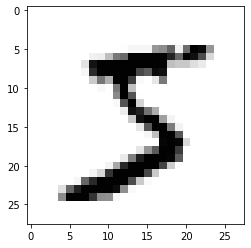

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [20]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d'%i) #'%3d' %i, '%d\t' %i
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [21]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [22]:
X_test = X_test.reshape(X_test.shape[0],784).astype('float64') / 255

In [23]:
print("class : %d"%(Y_class_train[0]))

class : 5


In [36]:
import tensorflow as tf

Y_train = tf.keras.utils.to_categorical(Y_class_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_class_test, 10)

In [37]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


딥러닝 기본 프레임 만들기

In [43]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import os

# nmist로 데이터 불러오기
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

# x의 데이터셋을 784로 나누어서 리쉐이프하기 그리고 배열을 각각 255(색)으로 나누기
X_train  = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test  = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# y의 데이터를 
Y_train  = tf.keras.utils.to_categorical(Y_train, 10)
Y_test  = tf.keras.utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test) [1]))


Epoch 00001: val_loss improved from inf to 0.15154, saving model to ./model\01-0.1515.hdf5

Epoch 00002: val_loss improved from 0.15154 to 0.10578, saving model to ./model\02-0.1058.hdf5

Epoch 00003: val_loss improved from 0.10578 to 0.08270, saving model to ./model\03-0.0827.hdf5

Epoch 00004: val_loss improved from 0.08270 to 0.07159, saving model to ./model\04-0.0716.hdf5

Epoch 00005: val_loss improved from 0.07159 to 0.06428, saving model to ./model\05-0.0643.hdf5

Epoch 00006: val_loss did not improve from 0.06428

Epoch 00007: val_loss improved from 0.06428 to 0.06205, saving model to ./model\07-0.0621.hdf5

Epoch 00008: val_loss did not improve from 0.06205

Epoch 00009: val_loss improved from 0.06205 to 0.06053, saving model to ./model\09-0.0605.hdf5

Epoch 00010: val_loss improved from 0.06053 to 0.05949, saving model to ./model\10-0.0595.hdf5

Epoch 00011: val_loss did not improve from 0.05949

Epoch 00012: val_loss did not improve from 0.05949

Epoch 00013: val_loss did n

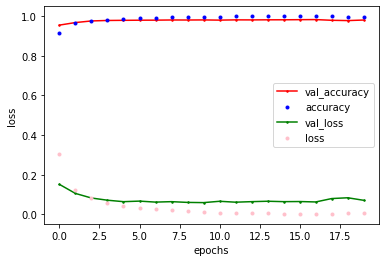

In [44]:

#테스트셋으로 실험 오차값 저장
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

#학습셋으로 정확도 값 저장
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

#x값을 지저앟고 정확도를 파란색, 오차를 빨간색
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vacc, marker='.', c="red", markersize=3, label='val_accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='accuracy')
plt.plot(x_len, y_vloss, marker='.', c="green", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="pink", markersize=3, label='loss')
plt.legend(loc='right')
plt.xlabel('epochs')
plt.ylabel('loss')


plt.show()